In [14]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visual style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Ignore warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

print("✅ Libraries Imported Successfully")

✅ Libraries Imported Successfully


In [15]:

# Load the dataset
df = pd.read_csv("/content/crop_recommendation_dataset.csv")

# Quick look at the data
print(f"Dataset Shape: {df.shape}")
df.head()


Dataset Shape: (30530, 8)


,N,P,K,temperature,humidity,ph,rainfall,label
0,55.451049,34.759023,68.474255,22.055635,77.501063,6.963747,796.866368,almond
1,65.487804,35.366590,51.400261,16.546457,82.125037,6.499078,719.580897,almond
2,60.034090,33.827064,50.564195,18.878279,63.595961,7.150979,730.626227,almond
3,67.035540,38.268171,54.173506,19.991211,76.113196,7.507708,812.872838,almond
4,67.861981,35.337592,73.738320,24.680909,86.299608,6.659872,718.605649,almond


In [16]:
# Check for missing values and data types
print("--- Data Info ---")
print(df.info())

print("\n--- Missing Values ---")
print(df.isnull().sum())

print("\n--- Duplicate Rows ---")
print(f"Duplicates Found: {df.duplicated().sum()}")

--- Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30530 entries, 0 to 30529
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            30530 non-null  float64
 1   P            30530 non-null  float64
 2   K            30530 non-null  float64
 3   temperature  30530 non-null  float64
 4   humidity     30530 non-null  float64
 5   ph           30530 non-null  float64
 6   rainfall     30530 non-null  float64
 7   label        30530 non-null  object 
dtypes: float64(7), object(1)
memory usage: 1.9+ MB
None

--- Missing Values ---
N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

--- Duplicate Rows ---
Duplicates Found: 0


In [17]:
# Statistical summary of numerical columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
N,30530.0,67.318959,37.817408,0.000000,42.146217,60.453968,89.894356,194.789434
P,30530.0,49.229495,20.130845,0.000000,39.278988,45.753459,60.000000,150.000000
K,30530.0,53.992459,40.141726,0.000000,24.000000,45.000000,71.171207,500.000000
temperature,30530.0,24.624678,5.624915,0.008489,20.891188,25.460000,28.500000,46.732778
humidity,30530.0,73.534671,15.386077,0.241239,65.135813,78.953720,83.621437,99.748924
ph,30530.0,6.264561,0.784655,3.504752,5.620000,6.344240,6.738652,9.983822
rainfall,30530.0,604.738930,527.626778,0.000000,107.413725,579.750000,888.613421,3322.060000


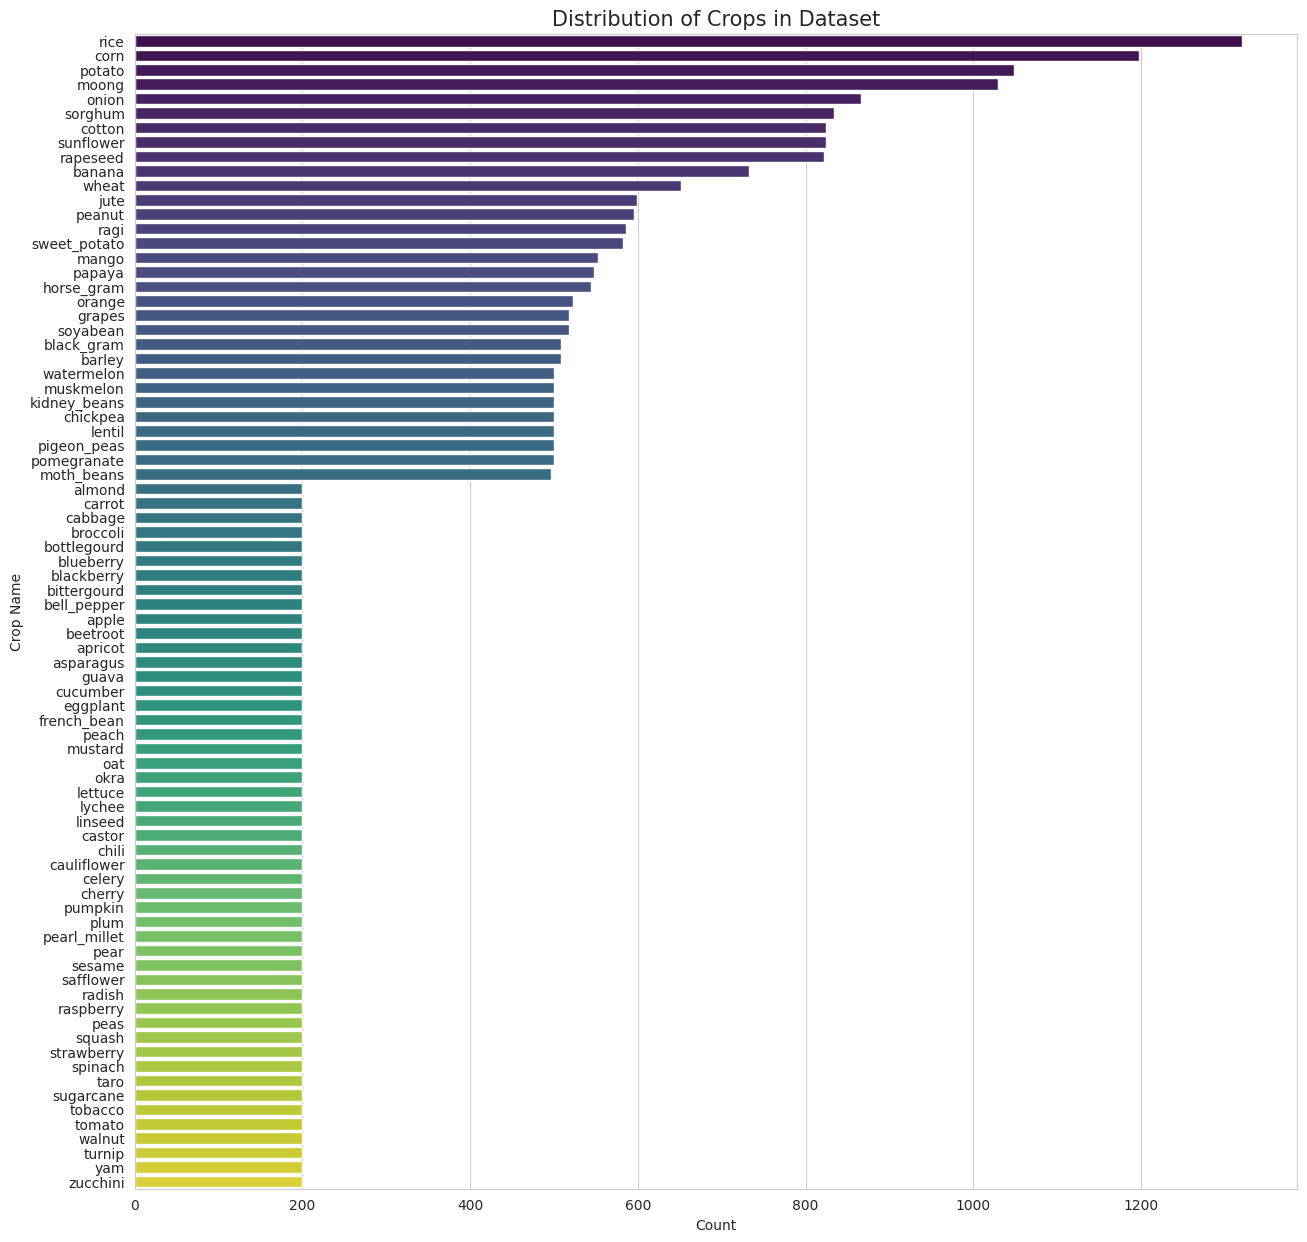

In [24]:
# Check how many samples we have for each crop
plt.figure(figsize=(15, 15))
sns.countplot(y='label', data=df, palette='viridis', order=df['label'].value_counts().index)
plt.title('Distribution of Crops in Dataset', fontsize=15)
plt.xlabel('Count')
plt.ylabel('Crop Name')
plt.show()

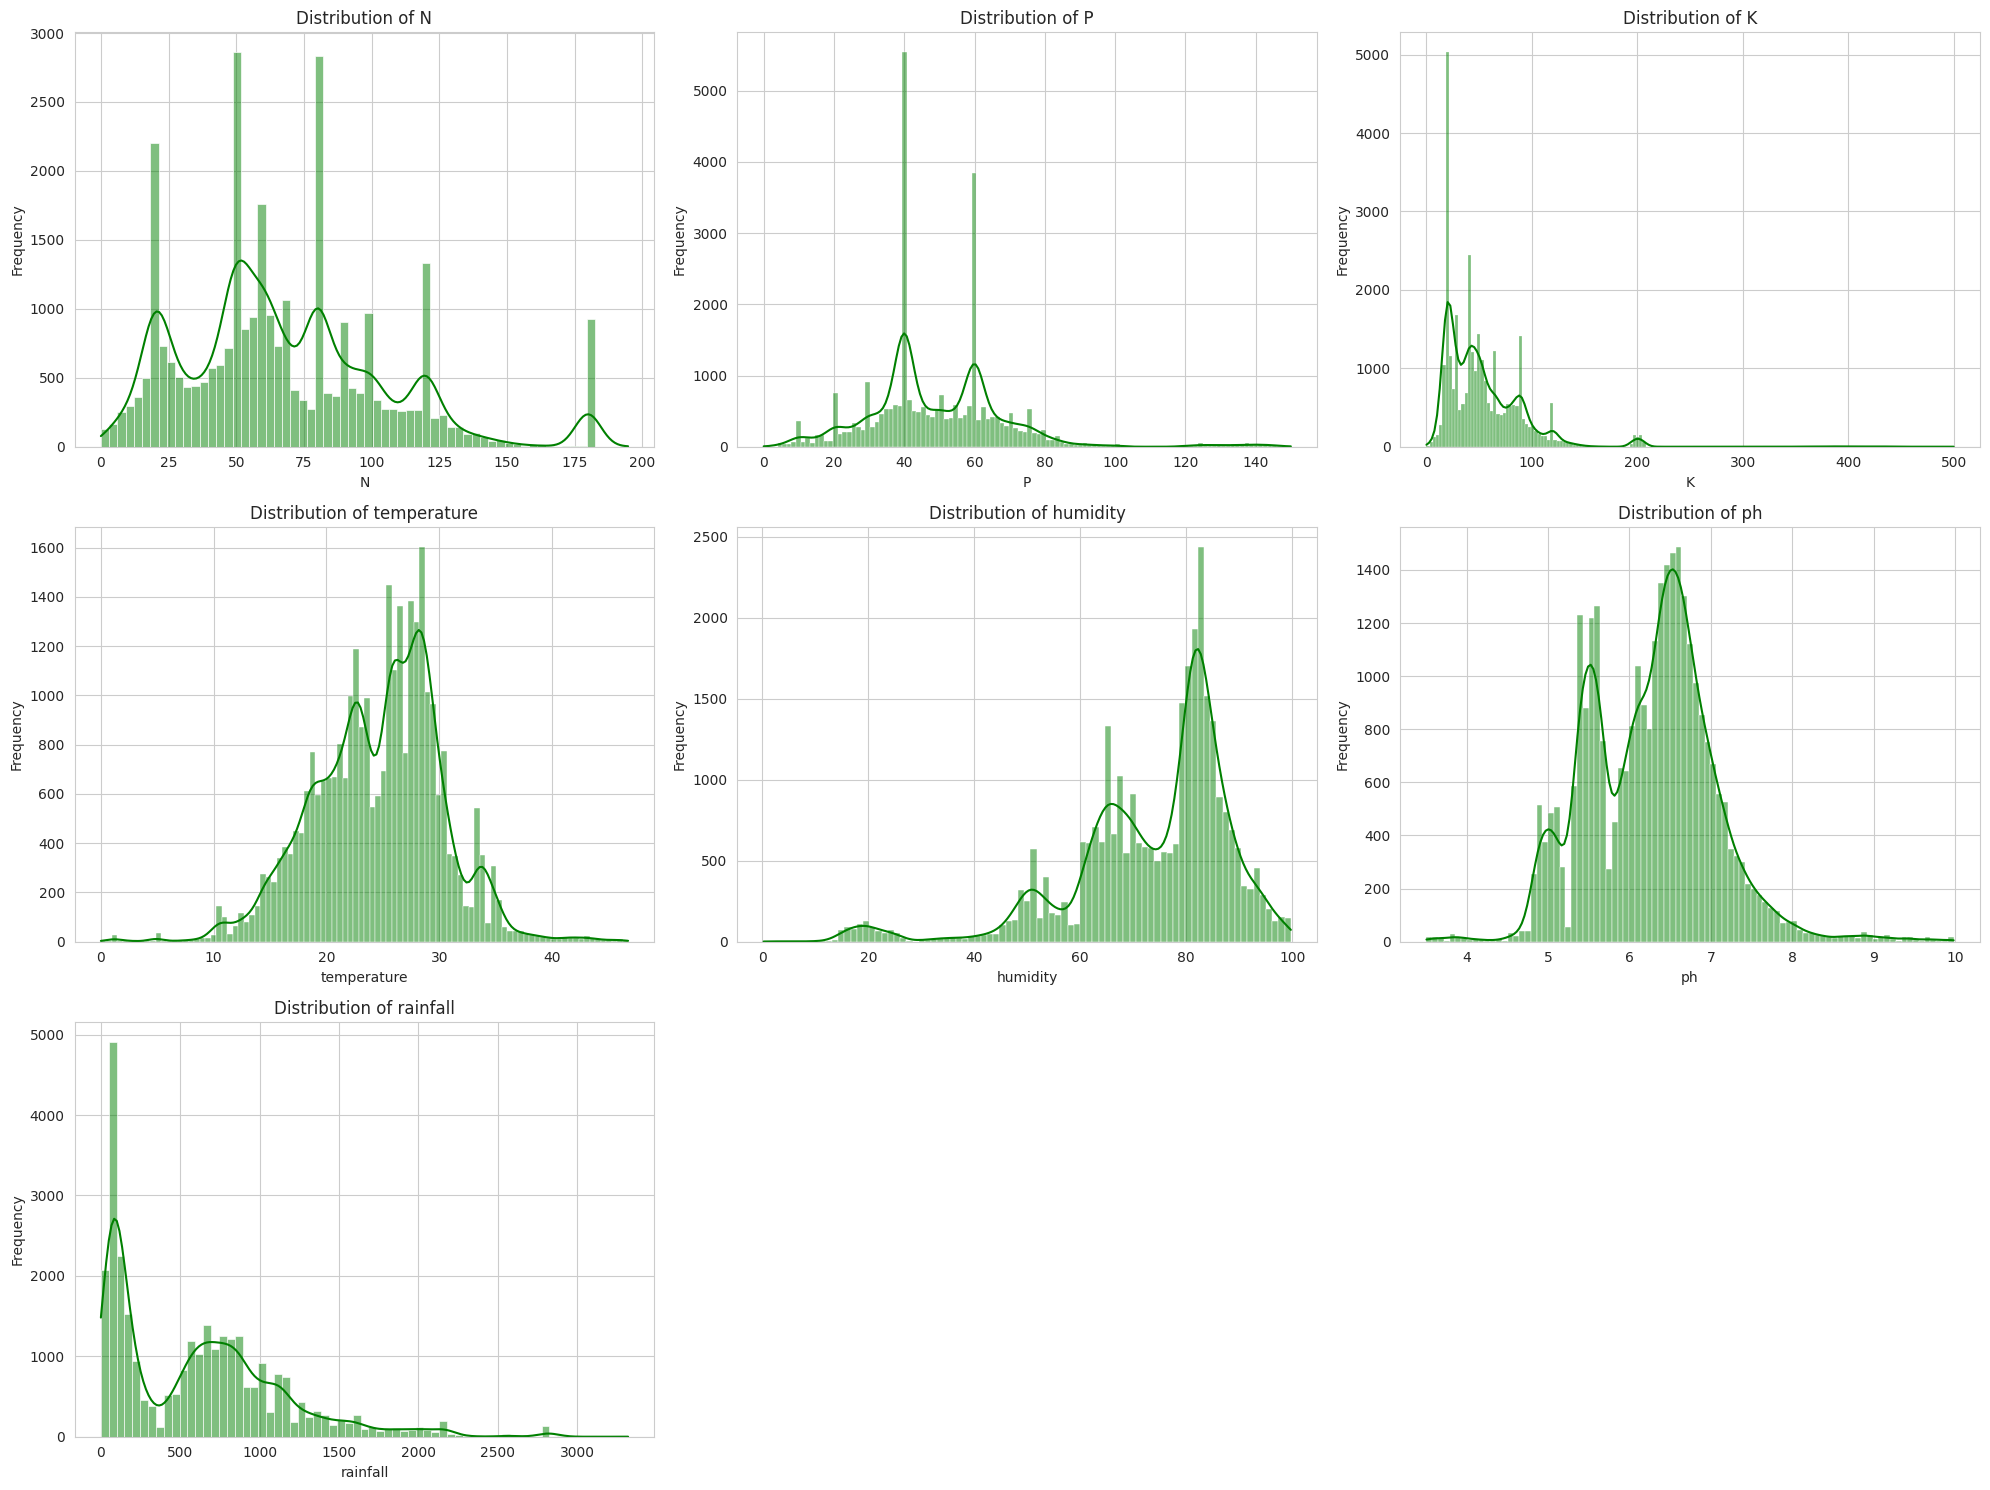

In [25]:
# Plot histograms for all features
features = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']

plt.figure(figsize=(20, 15))
for i, col in enumerate(features):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[col], kde=True, color='green')
    plt.title(f'Distribution of {col}', fontsize=12)
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

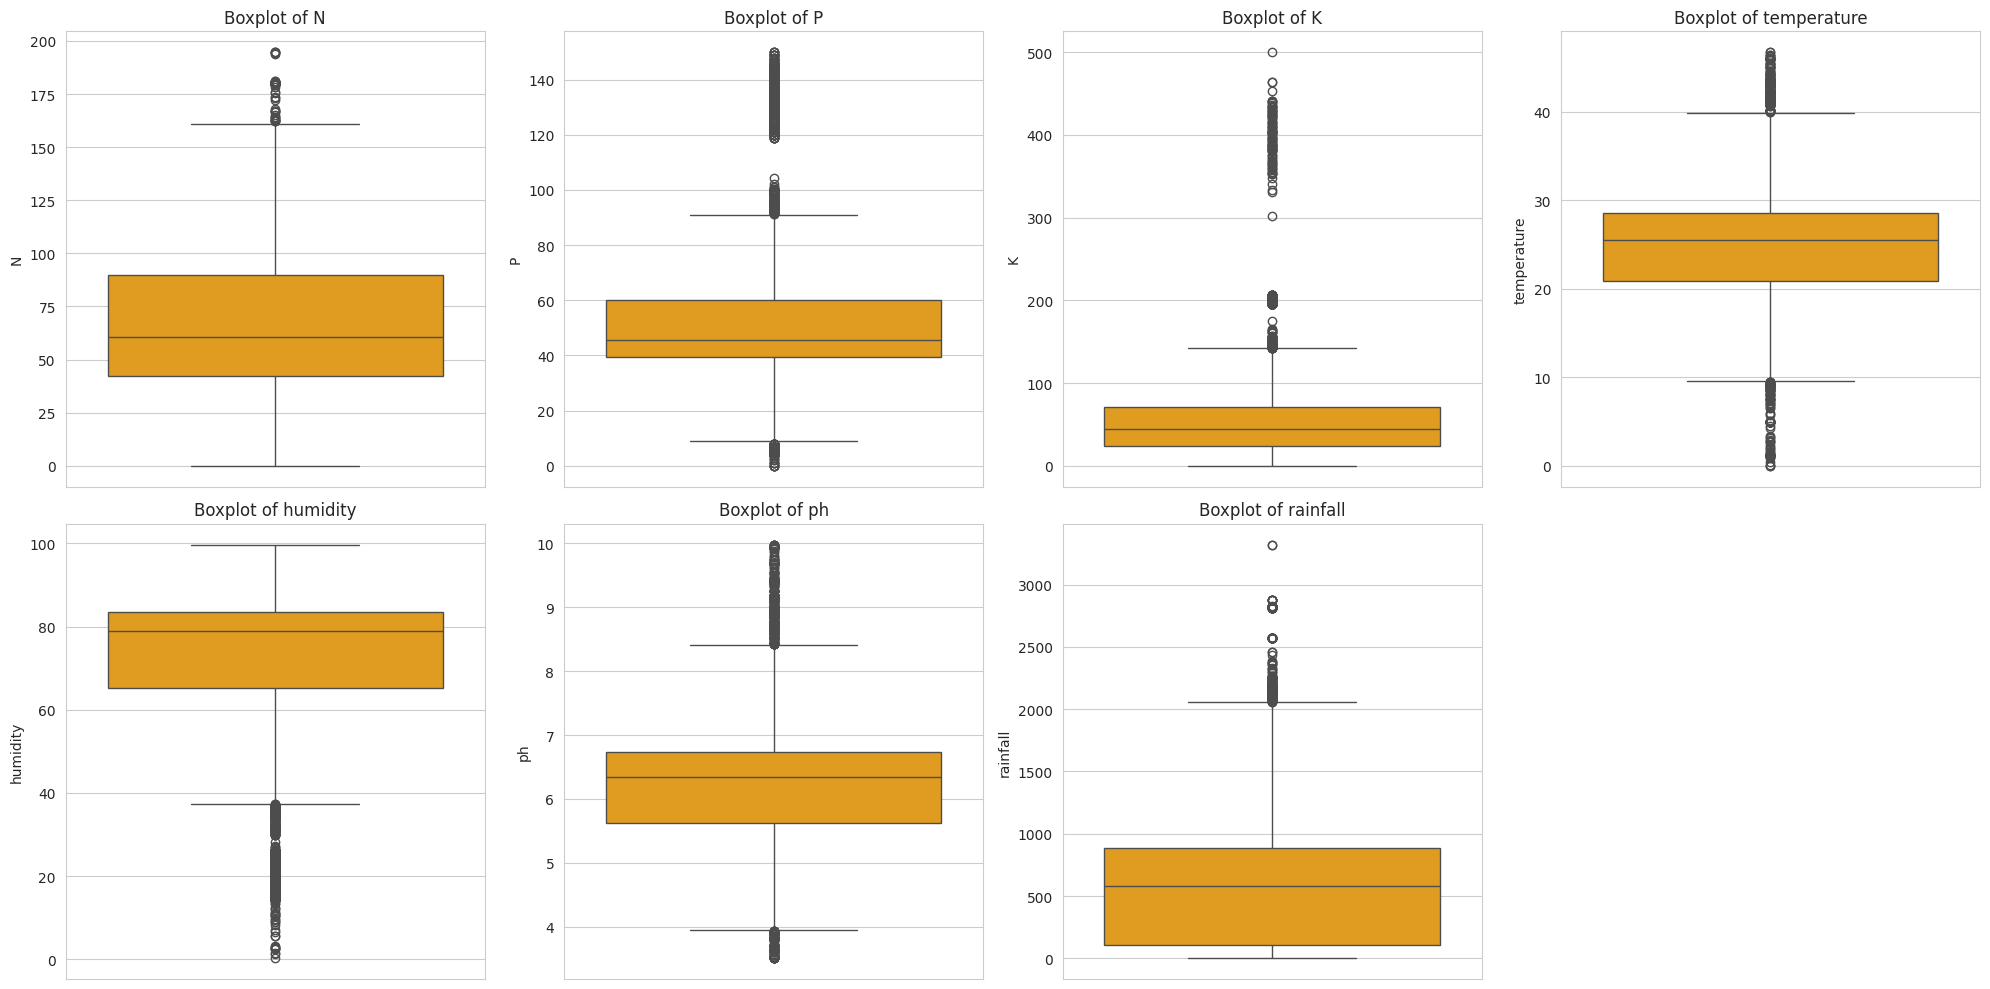

In [26]:
# Boxplots to visualize outliers
plt.figure(figsize=(20, 10))
for i, col in enumerate(features):
    plt.subplot(2, 4, i + 1)
    sns.boxplot(y=df[col], color='orange')
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

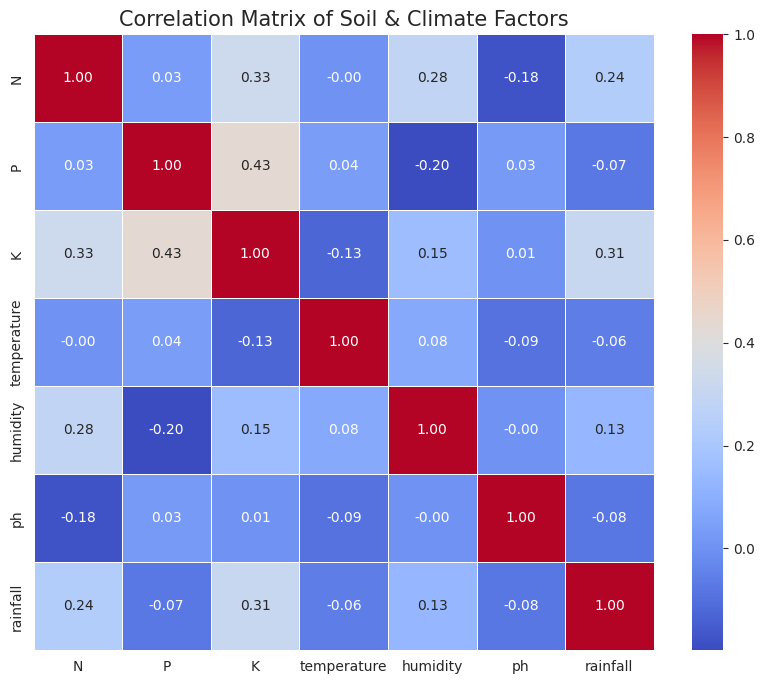

In [27]:
# Correlation Matrix
plt.figure(figsize=(10, 8))
numeric_df = df.select_dtypes(include=[np.number]) # Select only numbers
correlation = numeric_df.corr()

sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Soil & Climate Factors', fontsize=15)
plt.show()

In [28]:
# Calculate average requirement per crop
pivot = df.pivot_table(index='label', values=['N', 'P', 'K', 'rainfall', 'temperature', 'ph', 'humidity'], aggfunc='mean')

# Display the top 5 Nitrogen-hungry crops
print("Top 5 Nitrogen-Hungry Crops:")
print(pivot['N'].sort_values(ascending=False).head())

print("\nTop 5 Water-Intensive Crops:")
print(pivot['rainfall'].sort_values(ascending=False).head())

Top 5 Nitrogen-Hungry Crops:
label
potato         171.216787
sugarcane      136.943206
tomato         121.155811
bell_pepper    119.111579
cotton         118.755209
Name: N, dtype: float64

Top 5 Water-Intensive Crops:
label
taro           2012.373168
sugarcane      1958.051026
lychee         1780.573791
bittergourd    1653.639803
guava          1501.707355
Name: rainfall, dtype: float64


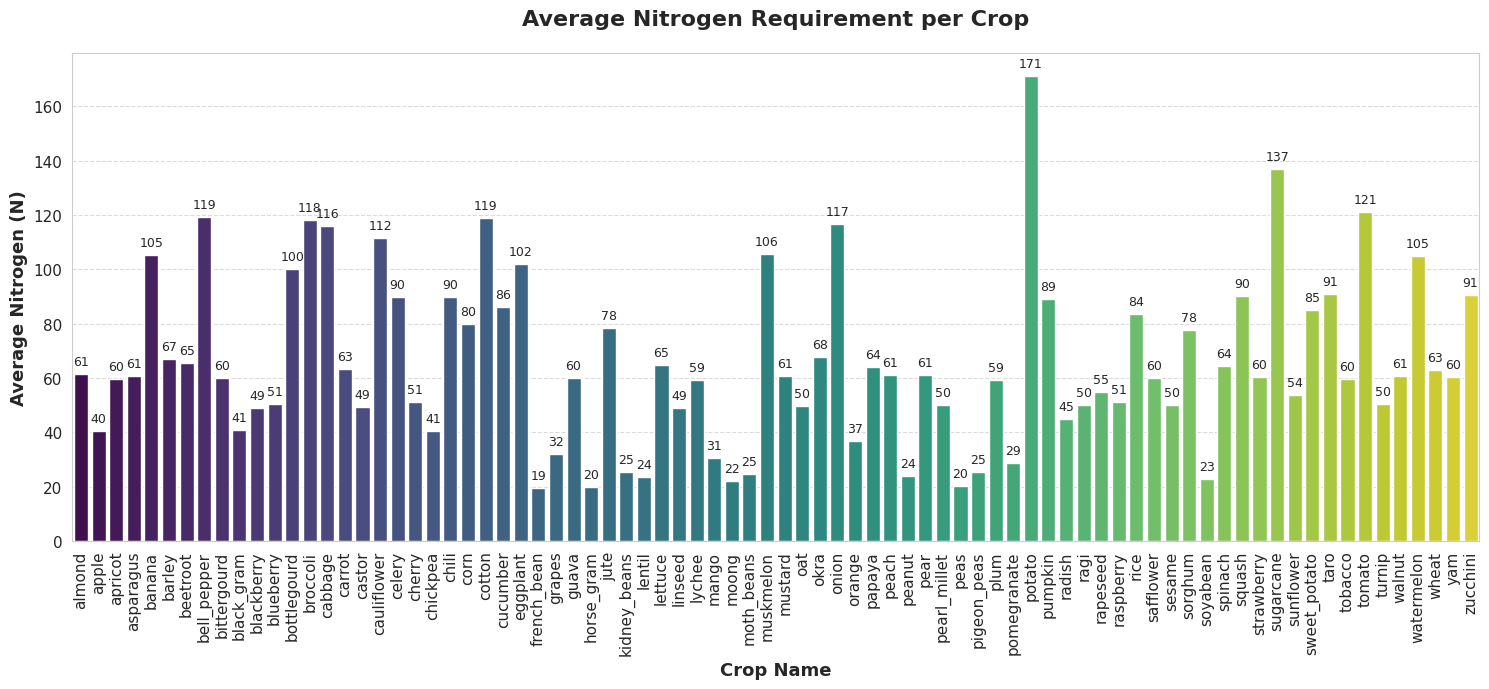

In [32]:
# Nitrogen Requirement Visualization
plt.figure(figsize=(15, 7))

# Create barplot with a distinct 'viridis' palette (Green/Yellow/Blue gradient)
ax = sns.barplot(x=pivot.index, y=pivot['N'], palette='viridis')

# Customization
plt.xticks(rotation=90, fontsize=11)
plt.yticks(fontsize=11)
plt.xlabel('Crop Name', fontsize=13, fontweight='bold')
plt.ylabel('Average Nitrogen (N)', fontsize=13, fontweight='bold')
plt.title('Average Nitrogen Requirement per Crop', fontsize=16, fontweight='bold', pad=20)

# Add value labels on top of bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),
                textcoords = 'offset points',
                fontsize=9)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

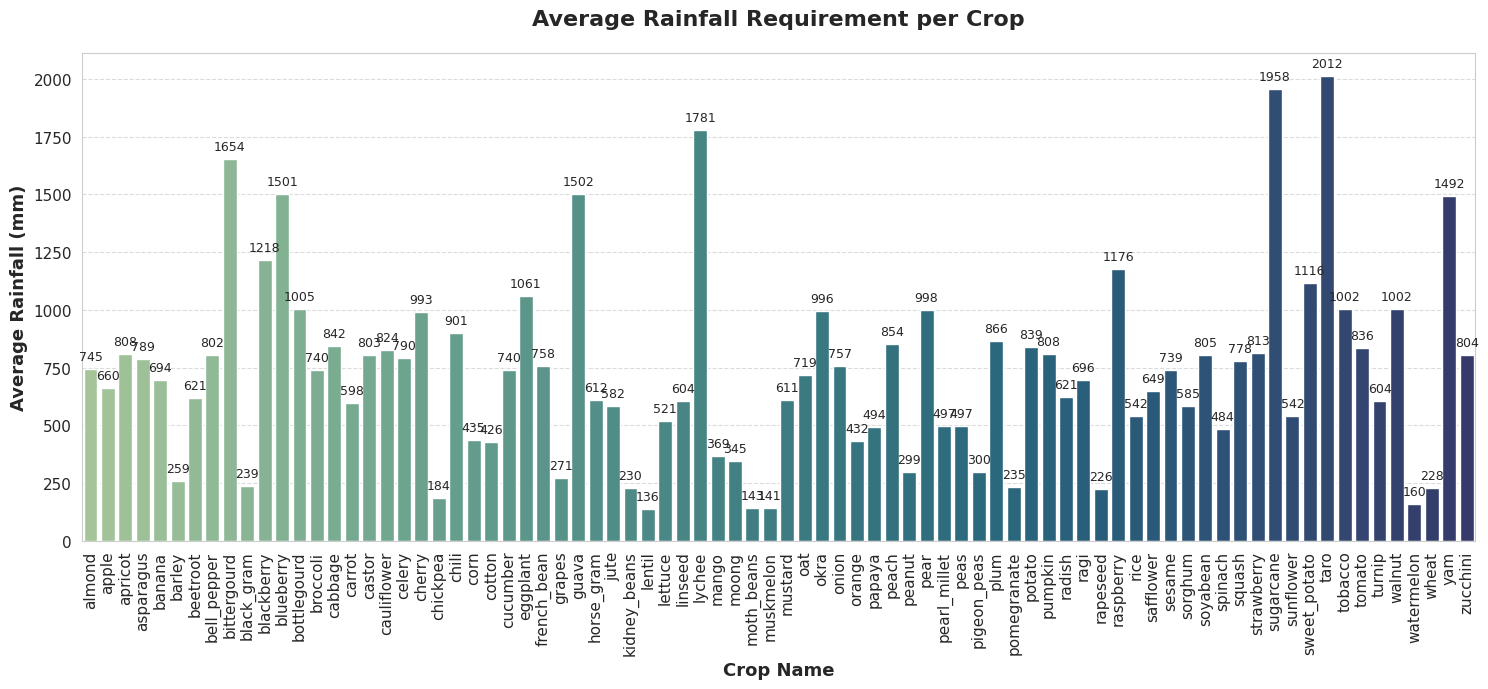

In [35]:
# Rainfall Requirement Visualization
plt.figure(figsize=(15, 7))

# Create barplot with 'mako' palette (Teal/Blue/Purple gradient - looks like water/depth)
ax = sns.barplot(x=pivot.index, y=pivot['rainfall'], palette='crest')

# Customization
plt.xticks(rotation=90, fontsize=11)
plt.yticks(fontsize=11)
plt.xlabel('Crop Name', fontsize=13, fontweight='bold')
plt.ylabel('Average Rainfall (mm)', fontsize=13, fontweight='bold')
plt.title('Average Rainfall Requirement per Crop', fontsize=16, fontweight='bold', pad=20)

# Add value labels on top of bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),
                textcoords = 'offset points',
                fontsize=9)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()